## T-test
- A statistical test used to compare  the means of two groups and determine if there's a siginificant difference between them
- There are two types of t-tests
    - one sample t-test (independent)
    - two sample t-test (paired)

### Independent T-test

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

In [2]:
#calculate the mean of scores

scores = [80, 70, 92, 77, 65, 42, 89, 76, 44, 58, 93, 82, 55, 20, 94, 67, 84, 90, 93]

scores_mean = np.mean(scores)
print(scores_mean)

72.15789473684211


In [3]:
#Get a sample size from the scores list

sample_size = 7

scores_sample = np.random.choice(scores, sample_size)
print(scores_sample)

[84 77 82 55 44 70 76]


In [4]:
print(np.mean(scores_sample))

69.71428571428571


### Is there a statistical difference between the means of the scores and sample score data?
With a significance level of 0.05 (5%)
- Null Hypotheis: There is no difference
- Alternate Hypothesis: There is a difference

In [5]:
ttest, pvalue = stats.ttest_1samp(scores_sample, np.mean(scores))
print(pvalue)

if pvalue < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the alternate hypothesis')

0.6787806837129693
Fail to reject the alternate hypothesis


### Paired T-test

### Is there a statistical difference between the scores of the two classes?
With a significance level of 0.05 (5%)
- Null Hypotheis: There is no difference
- Alternate Hypothesis: There is a difference

In [6]:
#get the scores for classes a and b

scores_class_a = stats.poisson.rvs(loc=45, mu=70, size=60)
scores_class_b = stats.poisson.rvs(loc=55, mu=70, size=65)

In [7]:
#calculate the t-test

_, pvalue = stats.ttest_ind(a=scores_class_a, b=scores_class_b, equal_var=False)
print(pvalue)

if pvalue < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the alternate hypothesis')

1.891475960453864e-12
Reject the null hypothesis


#### Related data

In [8]:
#get the scores and then adjust the scores
scores_class_c = stats.poisson.rvs(loc=45, mu=70, size=60)
adjusted_scores_class_c = scores_class_c + stats.norm.rvs(scale=5, loc=5, size=60)

In [9]:
print(scores_class_c)
print(adjusted_scores_class_c)

[127 113 120 112 118 111 110 114 120 112  96 104 136 115 116 119 108 114
 100 110 119 120 120 113 113 122 113 122 124 107 125 114 101 115 110 129
 121 132 114 120 134 102 123 107  94 126 116  98 124 111 114 115 133 106
 115 108 120 131 116 123]
[134.89741732 115.55563577 125.74826423 111.67196107 127.11914972
 122.21916272 121.39898415 124.63213812 142.53364983 118.97658059
 103.27243315 119.47933488 138.35899649 125.7872     123.96538476
 122.41860542 118.29268219 114.43708878  97.31689249 111.08857689
 121.84161971 117.80333071 123.32993089 112.96270674 114.95975354
 126.51621676 111.74201815 129.62232653 128.17261103 109.78692241
 123.81569919 128.06534995 103.36963923 118.11709625 120.75339495
 139.89171935 120.01106693 126.8302743  124.24281181 132.7852369
 146.30253302 103.17082557 133.08414056 117.96211796  99.23008124
 130.65837459 122.57740783 102.78687096 129.39217643 115.18126955
 119.53774288 127.40785567 138.76660588 114.58231961 112.64549763
 109.23225782 124.20315355 142

### Is there a statistical difference between the two scores afted adjusting?
With a significance level of 0.05 (5%)
- Null Hypotheis: There is no difference
- Alternate Hypothesis: There is a difference

In [10]:
#calculate the t-test

_, pvalue = stats.ttest_rel(a=scores_class_c, b=adjusted_scores_class_c)
print(pvalue)

if pvalue < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the alternate hypothesis')

4.37480849691546e-12
Reject the null hypothesis


## Correlation
- Correlation is a statistical measure that measures the extent to which variables are related t each other.
- A figure closer to 1 means variables are closely corelated while a figure closer to 0 means varibles are not corelated
- Positive correlation means varibale move in the same direction, increase in value in one variable is associated with increase in value of the other variable
- Negative correlation means varibale move in the opposite direction, increase in value in one variable is associated with decrease in value of the other variable

In [11]:
#load data

df = pd.read_csv('marketing.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [12]:
#drop columns unnamed and user id

df = df.drop(columns = ['Unnamed: 0', 'user id', 'test group', 'most ads day', 'converted'])
df.head()

,total ads,most ads hour
0,130,20
1,93,22
2,21,18
3,355,10
4,276,14


In [13]:
df.shape

(588101, 2)

In [14]:
df.corr()

,total ads,most ads hour
total ads,1.000000,-0.010837
most ads hour,-0.010837,1.000000


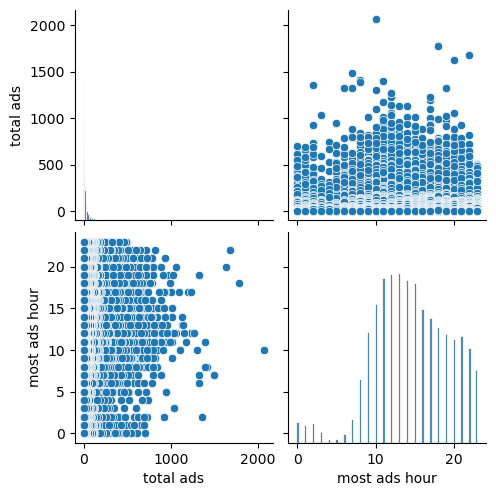

In [15]:
sns.pairplot(df)

#### 
- The correlation is negative, given the sign infront of the figures. 
- The value -0.010837 is very close to 0, indicating a very weak correlation, implying no linear relationship between the variables.